<a href="https://colab.research.google.com/github/percivalyan/peramalan-fuzzy-nilai-tukar/blob/main/FuzzyPeramalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = {
    'tanggal': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01'],
    'nilai_tukar': [100, 102, 105, 103, 108, 107, 109]
}

df = pd.DataFrame(data)

# Menentukan nilai maksimum dan minimum
data_max = df['nilai_tukar'].max()
data_min = df['nilai_tukar'].min()

print(f'Nilai Maksimum: {data_max}')
print(f'Nilai Minimum: {data_min}')


Nilai Maksimum: 109
Nilai Minimum: 100


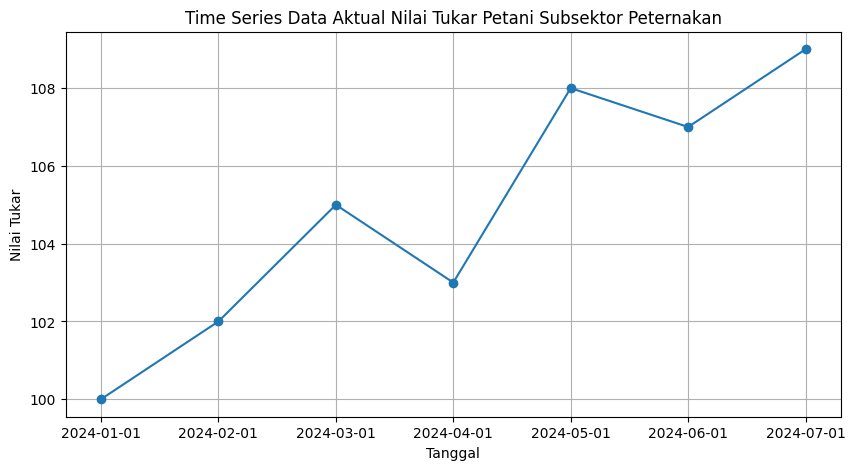

In [ ]:
# Plot data aktual
plt.figure(figsize=(10, 5))
plt.plot(data['tanggal'], data['nilai_tukar'], marker='o')
plt.title('Time Series Data Aktual Nilai Tukar Petani Subsektor Peternakan')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Tukar')
plt.grid(True)
plt.show()


In [ ]:
# Menentukan semesta pembicaraan U
U_min = data_min - 0.1 * (data_max - data_min)
U_max = data_max + 0.1 * (data_max - data_min)

print(f'Semesta Pembicaraan U: [{U_min}, {U_max}]')


Semesta Pembicaraan U: [99.1, 109.9]


In [ ]:
# Menentukan jumlah interval
n_intervals = 7
interval_length = (U_max - U_min) / n_intervals

print(f'Panjang Interval: {interval_length}')


Panjang Interval: 1.5428571428571445


In [ ]:
# Menghitung rata-rata selisih absolut
differences = np.abs(np.diff(data['nilai_tukar']))
mean_absolute_difference = np.mean(differences)

print(f'Rata-Rata Selisih Absolut: {mean_absolute_difference}')


Rata-Rata Selisih Absolut: 2.5


In [ ]:
# Menghitung basis interval
basis_intervals = [U_min + i * interval_length for i in range(n_intervals + 1)]

print(f'Basis Interval: {basis_intervals}')


Basis Interval: [99.1, 100.64285714285714, 102.18571428571428, 103.72857142857143, 105.27142857142857, 106.81428571428572, 108.35714285714286, 109.9]


In [ ]:
# Menghitung banyaknya himpunan fuzzy
n_fuzzy_sets = n_intervals

print(f'Banyaknya Himpunan Fuzzy: {n_fuzzy_sets}')


Banyaknya Himpunan Fuzzy: 7


In [ ]:
# Menentukan nilai tengah himpunan fuzzy
midpoints = [(basis_intervals[i] + basis_intervals[i+1]) / 2 for i in range(n_intervals)]

print(f'Nilai Tengah Himpunan Fuzzy: {midpoints}')


Nilai Tengah Himpunan Fuzzy: [99.87142857142857, 101.41428571428571, 102.95714285714286, 104.5, 106.04285714285714, 107.58571428571429, 109.12857142857143]


In [ ]:
# Fungsi untuk menentukan derajat keanggotaan
def membership_degree(value, interval_min, interval_max):
    if interval_min <= value <= interval_max:
        return 1 - abs((value - (interval_min + interval_max) / 2) / ((interval_max - interval_min) / 2))
    else:
        return 0

# Menghitung derajat keanggotaan
membership_degrees = []
for value in data['nilai_tukar']:
    degrees = [membership_degree(value, basis_intervals[i], basis_intervals[i+1]) for i in range(n_intervals)]
    membership_degrees.append(degrees)

data['membership_degrees'] = membership_degrees
print(data['membership_degrees'])


[[0.8333333333333272, 0, 0, 0, 0, 0, 0], [0, 0.24074074074073737, 0, 0, 0, 0, 0], [0, 0, 0, 0.3518518518518525, 0, 0, 0], [0, 0, 0.9444444444444424, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.4629629629629677, 0], [0, 0, 0, 0, 0, 0.24074074074073737, 0], [0, 0, 0, 0, 0, 0, 0.8333333333333272]]


In [ ]:
# Fungsi untuk menentukan derajat keanggotaan
def membership_degree(value, interval_min, interval_max):
    if interval_min <= value <= interval_max:
        return 1 - abs((value - (interval_min + interval_max) / 2) / ((interval_max - interval_min) / 2))
    else:
        return 0

# Menghitung derajat keanggotaan
membership_degrees = []
for value in data['nilai_tukar']:
    degrees = [membership_degree(value, basis_intervals[i], basis_intervals[i+1]) for i in range(n_intervals)]
    membership_degrees.append(degrees)

data['membership_degrees'] = membership_degrees
print(data['membership_degrees'])


[[0.8333333333333272, 0, 0, 0, 0, 0, 0], [0, 0.24074074074073737, 0, 0, 0, 0, 0], [0, 0, 0, 0.3518518518518525, 0, 0, 0], [0, 0, 0.9444444444444424, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.4629629629629677, 0], [0, 0, 0, 0, 0, 0.24074074074073737, 0], [0, 0, 0, 0, 0, 0, 0.8333333333333272]]


In [ ]:
import pandas as pd # Import pandas library

# Fuzzyfikasi data
def fuzzify(value):
    degrees = [membership_degree(value, basis_intervals[i], basis_intervals[i+1]) for i in range(n_intervals)]
    return degrees.index(max(degrees)) + 1

# Convert 'nilai_tukar' list to a Pandas Series
nilai_tukar_series = pd.Series(data['nilai_tukar'])

# Now you can use apply
data['fuzzy'] = nilai_tukar_series.apply(fuzzify)
print(data['fuzzy'])

0    1
1    2
2    4
3    3
4    6
5    6
6    7
dtype: int64


{1: [2], 2: [4], 4: [3]}
0    101.414286
1    104.500000
2    102.957143
3    102.957143
4    107.585714
5    107.585714
6    109.128571
dtype: float64


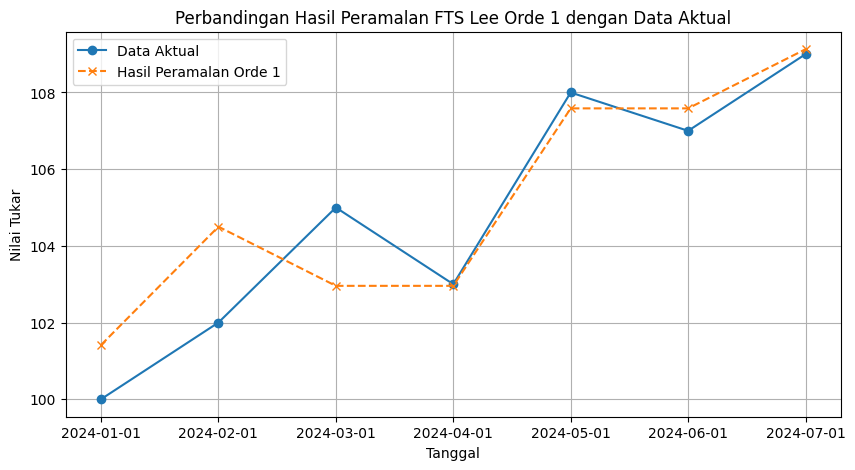

In [ ]:
# Membuat relasi logis fuzzy orde 1
FLR_1 = {}
for i in range(len(data) - 1):
    current_state = data['fuzzy'][i]
    next_state = data['fuzzy'][i + 1]
    if current_state not in FLR_1:
        FLR_1[current_state] = []
    FLR_1[current_state].append(next_state)

print(FLR_1)

# Defuzzyfikasi FLRG orde 1
def defuzzify(fuzzy_state):
    if fuzzy_state in FLR_1 and len(FLR_1[fuzzy_state]) > 0:
        return np.mean([midpoints[state - 1] for state in FLR_1[fuzzy_state]])
    else:
        return midpoints[fuzzy_state - 1]

data['forecast_1'] = data['fuzzy'].apply(defuzzify)
print(data['forecast_1'])

# Plot hasil peramalan orde 1
plt.figure(figsize=(10, 5))
plt.plot(data['tanggal'], data['nilai_tukar'], marker='o', label='Data Aktual')
plt.plot(data['tanggal'], data['forecast_1'], marker='x', linestyle='--', label='Hasil Peramalan Orde 1')
plt.title('Perbandingan Hasil Peramalan FTS Lee Orde 1 dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Tukar')
plt.legend()
plt.grid(True)
plt.show()

#


In [ ]:
# Membuat relasi logis fuzzy orde 2
FLR_2 = {}
for i in range(len(data) - 2):
    current_state = (data['fuzzy'][i], data['fuzzy'][i + 1])
    next_state = data['fuzzy'][i + 2]
    if current_state not in FLR_2:
        FLR_2[current_state] = []
    FLR_2[current_state].append(next_state)

print(FLR_2)

# Defuzzyfikasi FLRG orde 2
def defuzzify_order_2(fuzzy_state):
    if fuzzy_state in FLR_2 and len(FLR_2[fuzzy_state]) > 0:
        return np.mean([midpoints[state - 1] for state in FLR_2[fuzzy_state]])
    else:
        return np.mean([midpoints[state - 1] for state in fuzzy_state])

data['forecast_2'] = [None, None] + [defuzzify_order_2((data['fuzzy'][i], data['fuzzy'][i+1])) for i in range(len(data) - 2)]
print(data['forecast_2'])


{(1, 2): [4], (2, 4): [3], (4, 3): [6]}
[None, None, 104.5, 102.95714285714286, 107.58571428571429]


In [ ]:
# Membuat relasi logis fuzzy orde 2
FLR_2 = {}
for i in range(len(data) - 2):
    current_state = (data['fuzzy'][i], data['fuzzy'][i + 1])
    next_state = data['fuzzy'][i + 2]
    if current_state not in FLR_2:
        FLR_2[current_state] = []
    FLR_2[current_state].append(next_state)

print(FLR_2)

# Defuzzyfikasi FLRG orde

{(1, 2): [4], (2, 4): [3], (4, 3): [6], (3, 6): [6]}


In [ ]:
# Menghitung MAPE hasil peramalan orde 1
mape_order_1 = np.mean(np.abs((data['nilai_tukar'] - data['forecast_1']) / data['nilai_tukar'])) * 100
print(f'MAPE Hasil Peramalan Orde 1: {mape_order_1:.2f}%')


MAPE Hasil Peramalan Orde 1: 0.99%


In [ ]:
# Mengonversi data['forecast_2'] menjadi pandas.Series dan menghapus nilai NaN
data['forecast_2'] = pd.Series(data['forecast_2']).dropna().reset_index(drop=True)

# Menyelaraskan panjang data dengan memotong bagian yang sama
actual_data = pd.Series(data['nilai_tukar'][2:]).reset_index(drop=True)
forecast_data = data['forecast_2'][2:].reset_index(drop=True)

# Menghitung MAPE hasil peramalan orde 2
mape_order_2 = np.mean(np.abs((actual_data - forecast_data) / actual_data)) * 100
print(f'MAPE Hasil Peramalan Orde 2: {mape_order_2:.2f}%')


MAPE Hasil Peramalan Orde 2: 2.46%
